In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv('boston_house_prices.csv')
new_columns = df.iloc[0]

# Set the extracted row as the column names
df.columns = new_columns

# Remove the first row
df = df[1:]

# Now your DataFrame has the first row as column names


Preparing dataset

In [4]:
df = df.rename(columns={'MEDV':'Price'})
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


In [5]:
df = df.astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.shape

(506, 14)

EDA


In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,,,,,,,,,,,,,,
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


Text(0, 0.5, 'Prices')

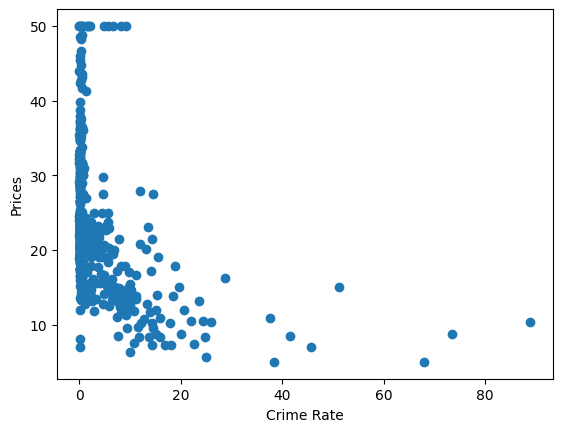

In [10]:
plt.scatter(df['CRIM'], df['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Prices')

Text(0, 0.5, 'Price')

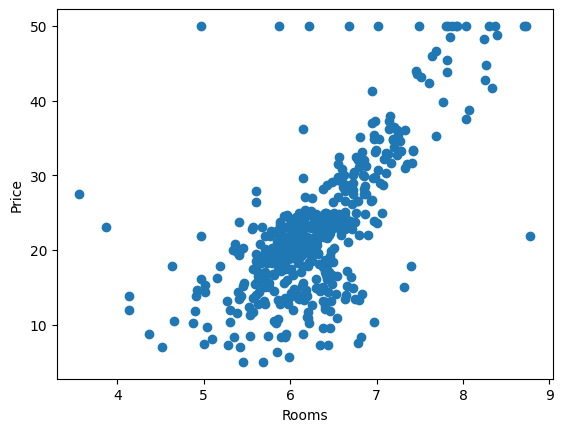

In [11]:
plt.scatter(df['RM'], df['Price'])
plt.xlabel("Rooms")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='Price'>

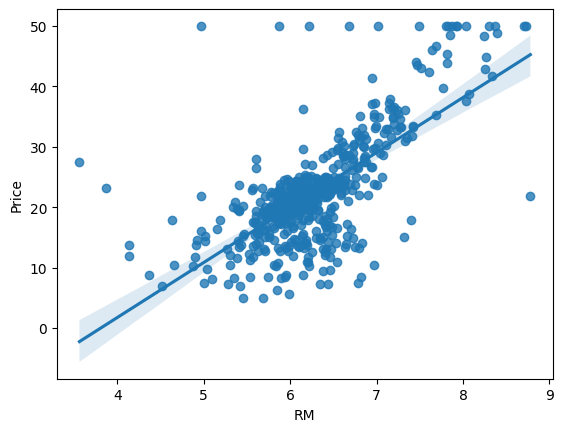

In [12]:
import  seaborn as sns 
sns.regplot(x="RM", y="Price", data=df)

<Axes: xlabel='LSTAT', ylabel='Price'>

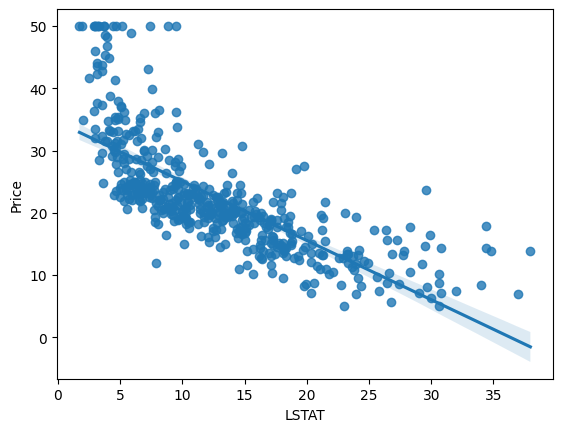

In [13]:
sns.regplot(x="LSTAT", y="Price", data=df)

<Axes: xlabel='PTRATIO', ylabel='Price'>

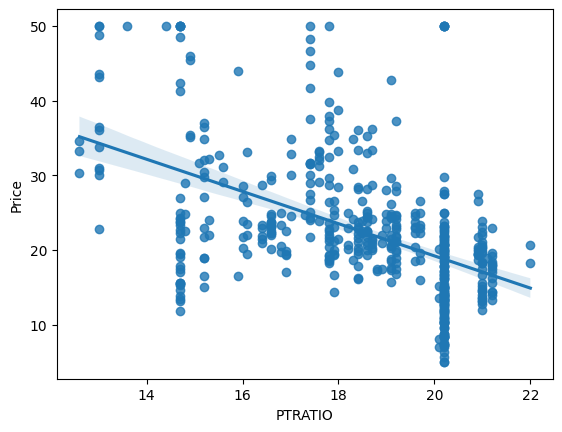

In [14]:
sns.regplot(x="PTRATIO", y="Price",data=df)

In [15]:
#Independent and Dependent Features

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [18]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
6,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
117,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
46,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
17,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
469,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
271,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
349,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
436,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


Standardizing the dataset

In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)


Model training

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
print(lr.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [22]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [23]:
#Prediction and Testing
lr_pred = lr.predict(X_test)
predicted_price = lr.predict(X_test)
predicted_dataframe = pd.DataFrame(
    {"Predicted_Prices":predicted_price, "Actual_Price":y_test})
print("Predicyed and actual Dataframe")
print(predicted_dataframe)

Predicyed and actual Dataframe
     Predicted_Prices  Actual_Price
174         30.778348          23.6
275         38.665815          32.4
492         16.967053          13.6
73          26.790358          22.8
453         20.360680          16.1
..                ...           ...
442         19.032183          17.1
24          14.475026          14.5
226         42.887626          50.0
434         18.699470          14.3
448         19.825302          12.6

[152 rows x 2 columns]


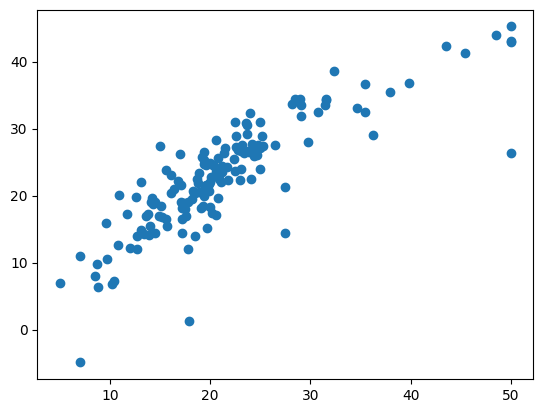

In [24]:
#scatter plot for prediction
plt.scatter(y_test, lr_pred)

In [25]:
residual = y_test-lr_pred
residual

174   -7.178348
275   -6.265815
492   -3.367053
73    -3.990358
453   -4.260680
         ...   
442   -1.932183
24     0.024974
226    7.112374
434   -4.399470
448   -7.225302
Name: Price, Length: 152, dtype: float64

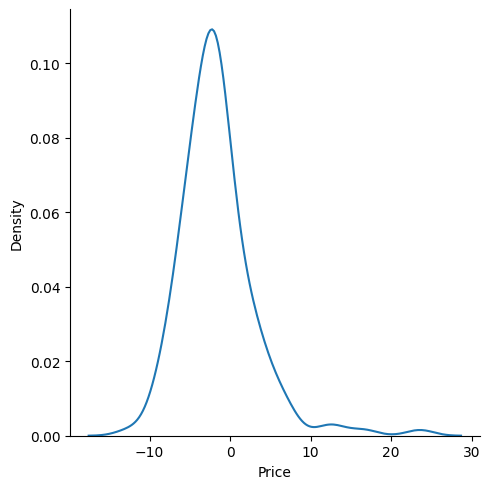

In [26]:
sns.displot(residual, kind='kde')

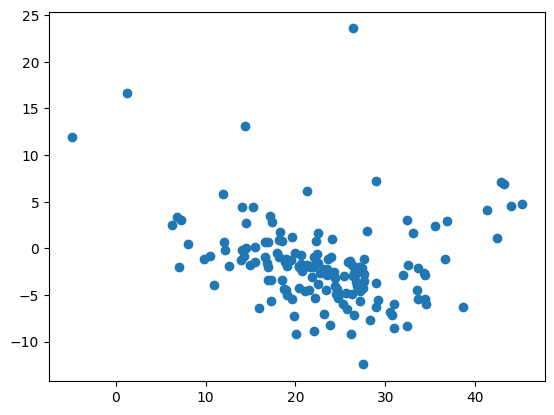

In [27]:
#scatter plot with respect to prediction and residuals
plt.scatter(lr_pred, residual)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, lr_pred))
print(mean_squared_error(y_test, lr_pred))

3.744212793154549
24.13479128906756


In [29]:
#R square and adjusted R square
from sklearn.metrics import r2_score
score = r2_score(y_test, lr_pred)
print(score)

0.6761000049033605


In [30]:
#adjusted r square
1-(1-score)*(len(y_test))/(len(y_test)-X_test.shape[1]-1)

0.6432405851109478

Defining hyperpatameters for xgboost for linear regression 

In [31]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameter grid
params = {
    'learning_rate':[0.1, 0.02, 0.01],
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5],
    'subsample': [0.8,0.9,1.0],
    'colsample_bytree': [0.8,0.9,1.0],
    'reg_lambda': [0.1, 1, 10],
    'reg_alpha': [0,0.1,1],
}

# Initialize the XGBRegressor model
xgb_model = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.9; total time=   0.0s


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0.1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0

In [35]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best parameters: ", best_params)

Best parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.8}


In [36]:
best_estimator.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
y_pred = best_estimator.predict(X_test)
from sklearn.metrics import r2_score

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.8760781202767657


array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

New data prediction

In [32]:
#transformation of newdata
import numpy as np
df['CRIM'].values.reshape(-1, 1)

array([[6.32000e-03],
       [2.73100e-02],
       [2.72900e-02],
       [3.23700e-02],
       [6.90500e-02],
       [2.98500e-02],
       [8.82900e-02],
       [1.44550e-01],
       [2.11240e-01],
       [1.70040e-01],
       [2.24890e-01],
       [1.17470e-01],
       [9.37800e-02],
       [6.29760e-01],
       [6.37960e-01],
       [6.27390e-01],
       [1.05393e+00],
       [7.84200e-01],
       [8.02710e-01],
       [7.25800e-01],
       [1.25179e+00],
       [8.52040e-01],
       [1.23247e+00],
       [9.88430e-01],
       [7.50260e-01],
       [8.40540e-01],
       [6.71910e-01],
       [9.55770e-01],
       [7.72990e-01],
       [1.00245e+00],
       [1.13081e+00],
       [1.35472e+00],
       [1.38799e+00],
       [1.15172e+00],
       [1.61282e+00],
       [6.41700e-02],
       [9.74400e-02],
       [8.01400e-02],
       [1.75050e-01],
       [2.76300e-02],
       [3.35900e-02],
       [1.27440e-01],
       [1.41500e-01],
       [1.59360e-01],
       [1.22690e-01],
       [1.

In [33]:
import pickle 
pickle.dump(lr, open('regmodel.pkl', 'wb'))

In [46]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object', name=0)